In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Read Dataset

In [2]:
ds_filepath = 'watch_test2_sample.csv'
col_datetimes = ['uts']
dtype = np.float64

col_names = pd.read_csv(filepath_or_buffer=ds_filepath, nrows=0).columns
col_types = dict((col,str) for col in col_datetimes)
col_types.update({col:dtype for col in col_names if col not in col_types})

df = pd.read_csv(filepath_or_buffer=ds_filepath, dtype=col_types, parse_dates=col_datetimes)
df

,uts,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
0,2018-11-18 08:18:41+07:00,-3.957379,-14.204506,2.303692,355.85300,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.0,12.0,1013.201
1,2018-11-18 08:18:41+07:00,-3.957379,-14.204506,2.303692,355.85300,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.0,12.0,1013.201
2,2018-11-18 08:18:41+07:00,-3.957379,-14.204506,2.303692,355.85300,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.0,12.0,1013.201
3,2018-11-18 08:18:41+07:00,-3.957379,-14.204506,2.303692,355.85300,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.0,12.0,1013.201
4,2018-11-18 08:18:41+07:00,-3.957379,-14.204506,2.303692,355.85300,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.0,12.0,1013.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,2018-11-18 16:09:04+07:00,0.480334,-8.700976,-4.669516,232.32242,13.553518,100.279728,0.065982,-0.058532,0.052147,63.0,0.0,1008.726
6272,2018-11-18 16:09:04+07:00,0.480334,-8.700976,-4.669516,232.32242,13.553518,100.279728,0.065982,-0.058532,0.052147,63.0,0.0,1008.726
6273,2018-11-18 16:09:04+07:00,0.480334,-8.700976,-4.669516,232.32242,13.553518,100.279728,0.065982,-0.058532,0.052147,63.0,0.0,1008.726
6274,2018-11-18 16:09:04+07:00,0.480334,-8.700976,-4.669516,232.32242,13.553518,100.279728,0.065982,-0.058532,0.052147,63.0,0.0,1008.726


# Duplicate datetime

In [3]:
before_shape = df.shape

df.drop_duplicates(['uts'],keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)

before_shape, df.shape

((6276, 13), (263, 13))

# Interpola

In [4]:
df[df.isna().any(axis=1)]

,uts,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
2,2018-11-18 08:19:45+07:00,1.906998,NaN,-4.358852,351.80853,13.621563,100.369088,-0.676847,-3.687540,1.123822,104.0,10.0,1013.218
4,2018-11-18 08:20:33+07:00,-2.098175,-11.195846,1.754056,354.06730,13.621545,100.369100,-2.849995,-1.562282,3.178840,NaN,11.0,1013.206
15,2018-11-18 08:25:04+07:00,-6.674493,-1.701482,1.593944,353.61404,13.621525,100.369090,NaN,0.744958,-1.311125,60.0,12.0,1013.299
20,2018-11-18 08:27:15+07:00,2.530715,-9.405945,3.321713,354.07440,13.621547,100.369122,-0.112808,0.490608,-0.654498,71.0,17.0,NaN


In [5]:
col_interpola = ['accelerateX', 'accelerateY', 'accelerateZ', 'gps.x', 'gps.y', 'gyro.x', 'gyro.y', 'gyro.z', 'heartrate', 'light', 'pressure']
interpola_limit = 2

before_interpola = df['accelerateY'].iloc[:4].copy()

for col in col_interpola: df[col].interpolate(method ='linear', limit_direction ='backward', limit=interpola_limit, inplace=True)

pd.concat([before_interpola, df['accelerateY'].iloc[:4]], axis=1)

,accelerateY,accelerateY
0,-14.204506,-14.204506
1,-1.156625,-1.156625
2,NaN,-5.652887
3,-10.149148,-10.149148


# Heartrate fill 2 std

/home/j/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


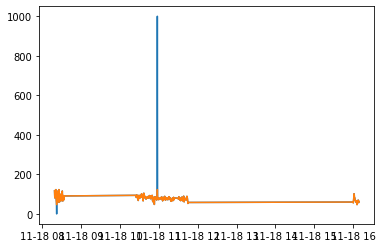

In [6]:
plt.plot(df['uts'], df['heartrate'])

heraterate_max2u = df[df['heartrate'] <= df['heartrate'].mean()*2].loc[:,'heartrate'].max()
heraterate_min2u = df[df['heartrate'] >= df['heartrate'].mean()/2].loc[:,'heartrate'].min()

df.loc[df['heartrate'] > df['heartrate'].mean()*2, ['heartrate']] = heraterate_max2u
df.loc[df['heartrate'] < df['heartrate'].mean()/2, ['heartrate']] = heraterate_min2u

plt.plot(df['uts'], df['heartrate'])

## Moving avg

In [7]:
df.loc[:,['light', 'presure']].rolling(10, win_type='triang', min_periods=1).mean()

# df.loc[240:250,'light']

# plt.plot(df['uts'], df['pressure'])
# plt.plot(df['uts'], df['light'])

/home/j/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,light,presure
0,12.000000,NaN
1,12.000000,NaN
2,11.777778,NaN
3,11.500000,NaN
4,11.320000,NaN
...,...,...
258,54.120000,NaN
259,46.900000,NaN
260,46.500000,NaN
261,49.100000,NaN


# Standardized Norm

In [8]:
df_ex_uts = df.iloc[:, 1:]
arr = df_ex_uts.values

std_scale = (arr - np.mean(arr)) / np.std(arr)

df_norm = pd.DataFrame(std_scale, columns=df_ex_uts.columns, index=df_ex_uts.index)
df_norm.insert(loc=0, column='uts', value=df['uts'])

df_norm

,uts,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
0,2018-11-18 08:18:41+07:00,-0.437790,-0.473874,-0.415743,0.829233,-0.375888,-0.070419,-0.428449,-0.433160,-0.412181,-0.011855,-0.381598,3.143993
1,2018-11-18 08:19:03+07:00,-0.423989,-0.427928,-0.417224,0.829233,-0.375889,-0.070419,-0.417259,-0.414977,-0.428415,-0.138624,-0.381598,3.143867
2,2018-11-18 08:19:45+07:00,-0.417139,-0.443761,-0.439204,0.814991,-0.375888,-0.070419,-0.426238,-0.436840,-0.419897,-0.057633,-0.388641,3.144053
3,2018-11-18 08:20:13+07:00,-0.424789,-0.459594,-0.413142,0.822945,-0.375888,-0.070419,-0.425395,-0.418368,-0.423686,0.005752,-0.388641,3.144018
4,2018-11-18 08:20:33+07:00,-0.431243,-0.463279,-0.417678,0.822945,-0.375888,-0.070419,-0.433891,-0.429356,-0.412661,0.007512,-0.385120,3.144011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2018-11-18 16:07:32+07:00,-0.406940,-0.423678,-0.452954,0.369226,-0.376137,-0.070732,-0.423967,-0.424188,-0.423724,-0.191445,-0.423855,3.127957
259,2018-11-18 16:07:58+07:00,-0.417585,-0.447131,-0.416525,0.379883,-0.376130,-0.070732,-0.428078,-0.423109,-0.424046,-0.177359,-0.075240,3.127925
260,2018-11-18 16:08:19+07:00,-0.422449,-0.453307,-0.442721,0.388148,-0.376128,-0.070734,-0.423922,-0.424076,-0.423502,-0.191445,-0.022419,3.128232
261,2018-11-18 16:08:42+07:00,-0.421229,-0.454915,-0.441838,0.394237,-0.376128,-0.070733,-0.423806,-0.423735,-0.423795,-0.223137,-0.268915,3.128119


# Visualization 

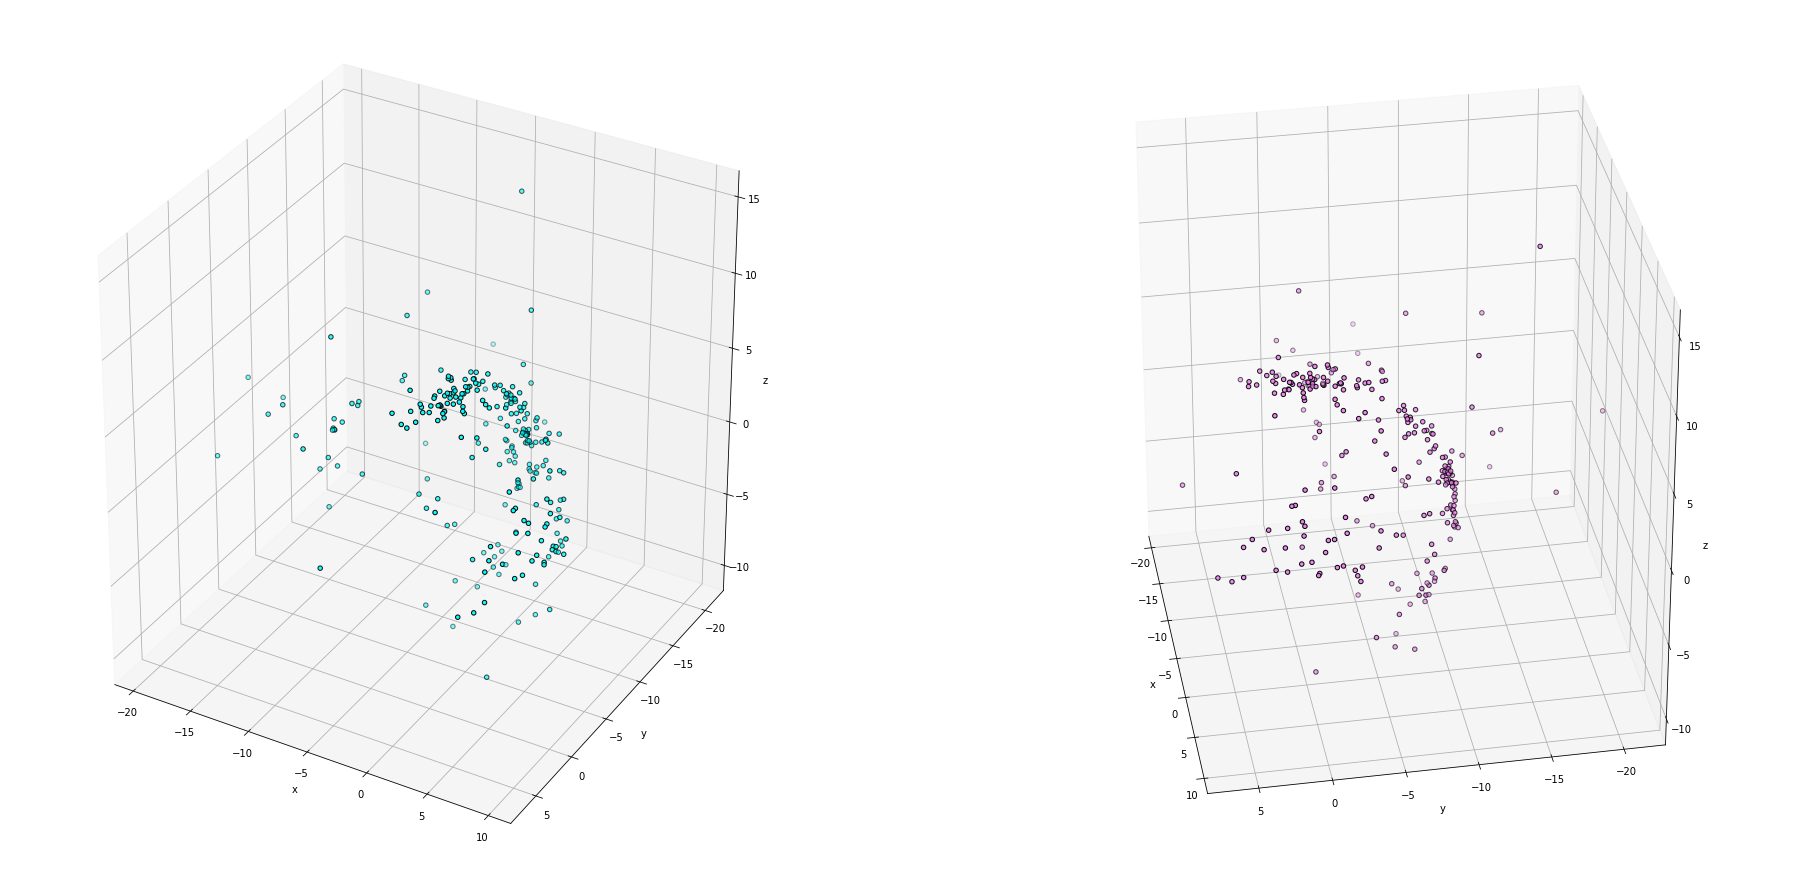

In [9]:
col_acc = ['accelerateX', 'accelerateY', 'accelerateZ']
x, y, z = np.transpose(np.reshape(df[col_acc].values, (-1, 3)))


figsize = (32, 16)
fig = plt.figure(figsize=figsize)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x, y, z, c='cyan', s=20, edgecolor='k')
ax.set_ylim3d(np.max(y), np.min(y))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, -60)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x, y, z, c='violet', s=20, edgecolor='k')
ax.set_ylim3d(np.max(y), np.min(y))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, -10)

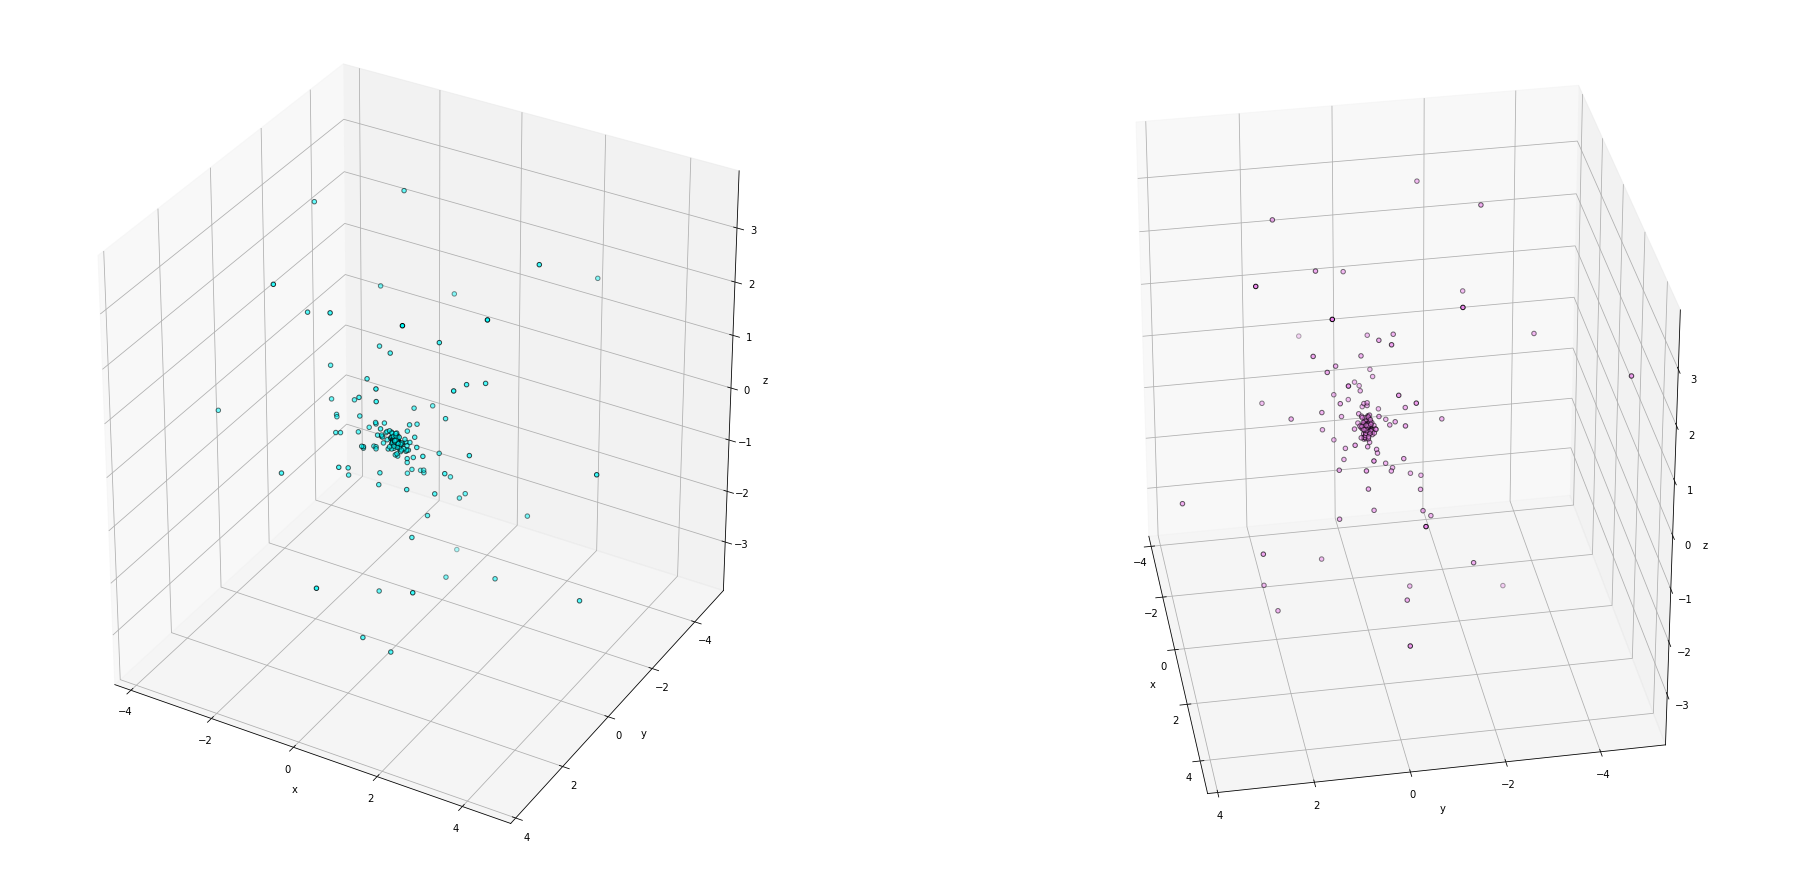

In [10]:
col_acc = ['gyro.x', 'gyro.y', 'gyro.z']
x, y, z = np.transpose(np.reshape(df[col_acc].values, (-1, 3)))


figsize = (32, 16)
fig = plt.figure(figsize=figsize)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x, y, z, c='cyan', s=20, edgecolor='k')
ax.set_ylim3d(np.max(y), np.min(y))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, -60)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x, y, z, c='violet', s=20, edgecolor='k')
ax.set_ylim3d(np.max(y), np.min(y))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, -10)

# Geolocation

In [11]:
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

map_im = plt.imread('map.png')

df_gps = df.loc[(df['gps.x']>0) & (df['gps.y'] > 0), ['gps.x', 'gps.y']]
b_box = (df_gps['gps.x'].min(), df_gps['gps.x'].max(),      
         df_gps['gps.y'].min(), df_gps['gps.y'].max())

b_box

(13.54799667, 13.62157333, 100.276605, 100.36917170000001)

(100.276605, 100.36917170000001)

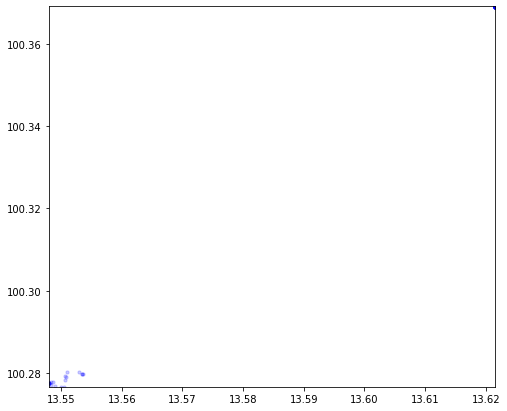

In [12]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df['gps.x'], df['gps.y'], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_xlim(b_box[0], b_box[1])
ax.set_ylim(b_box[2], b_box[3])
# ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

# Data Formate

In [13]:
col_sel = ['accelerateX', 'accelerateY', 'accelerateZ', 'compass', 'heartrate']

df_1 = df_norm[col_sel].values
df_1.shape

(263, 5)

In [14]:
time_window = 20
time_step = 5
n_feature = df_1.shape[1]
n_len = df_norm.shape[0]

segments = [df_1[i: i+time_window] for i in range(0, n_len -time_window, time_step)]
df_2 = np.array(segments, dtype=dtype).reshape(-1, time_window, n_feature)

df_2.shape

(49, 20, 5)

In [15]:
df_2 = df_2.reshape(-1, n_feature)
df_2.shape

(980, 5)

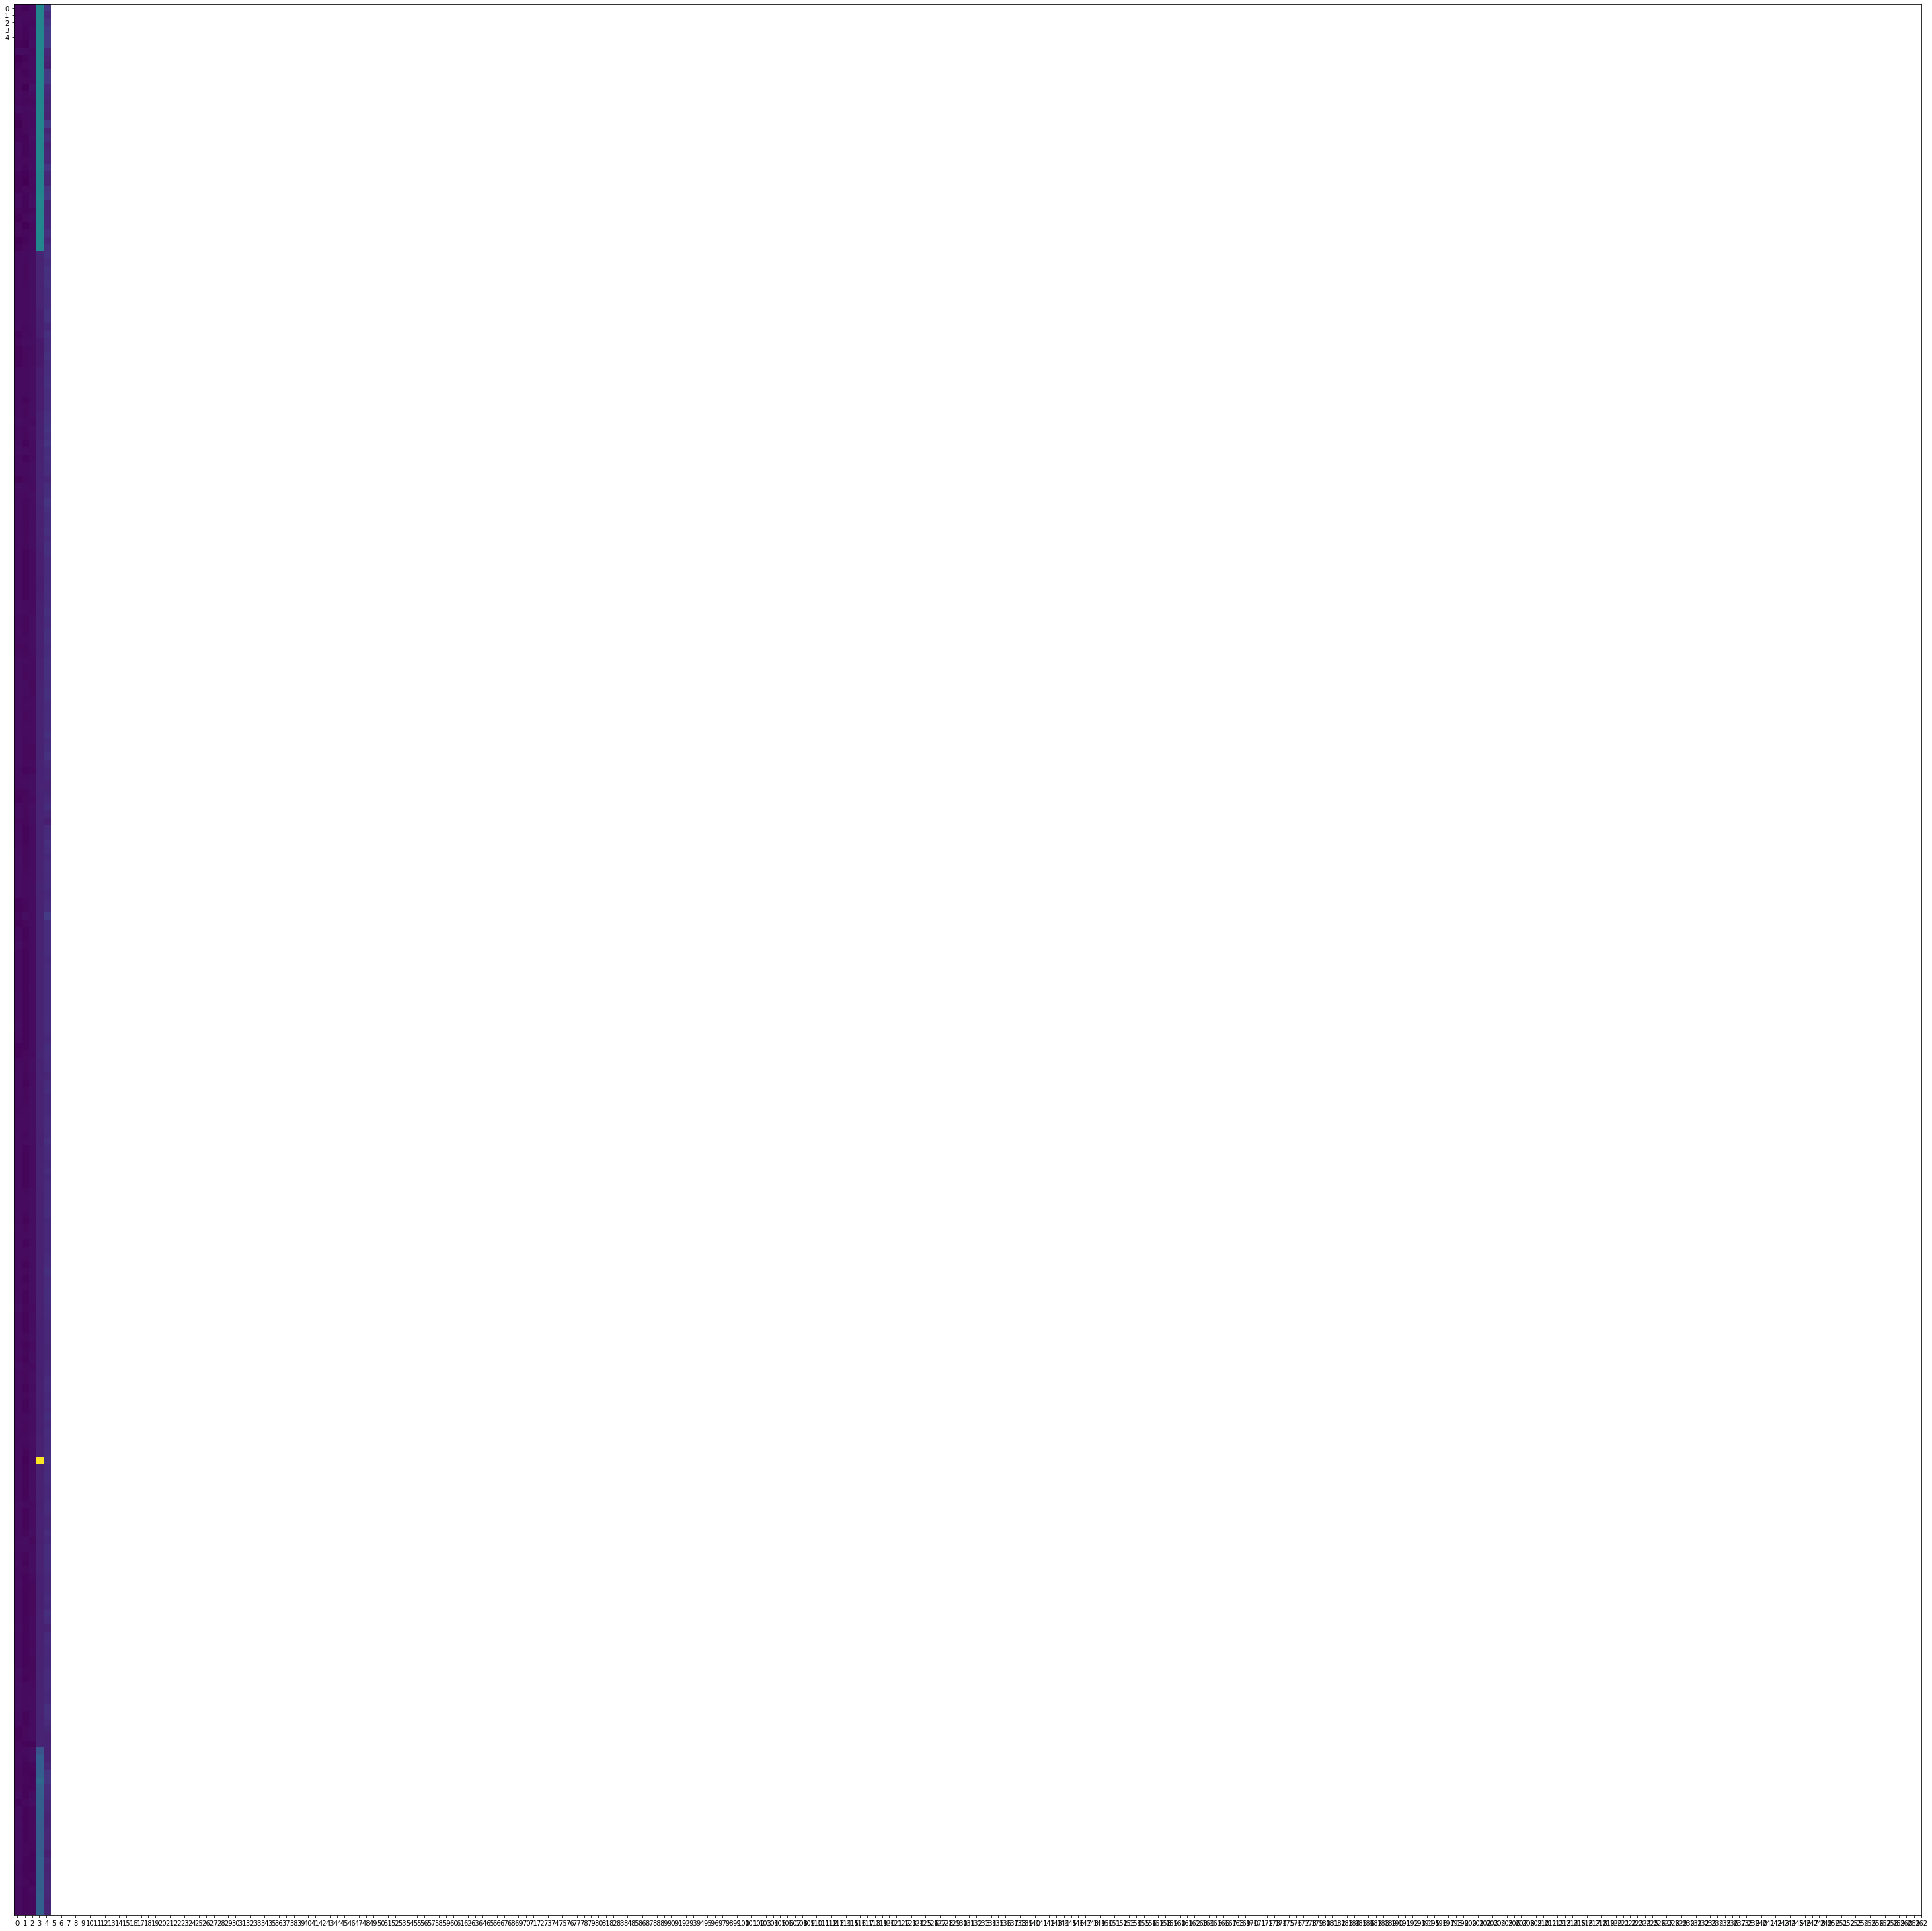

In [16]:
fig, ax = plt.subplots(figsize=(40,40))

im = ax.imshow(df_1)
ax.set_xticks(np.arange(df_1.shape[0]))
ax.set_yticks(np.arange(df_1.shape[1]))
fig.tight_layout()

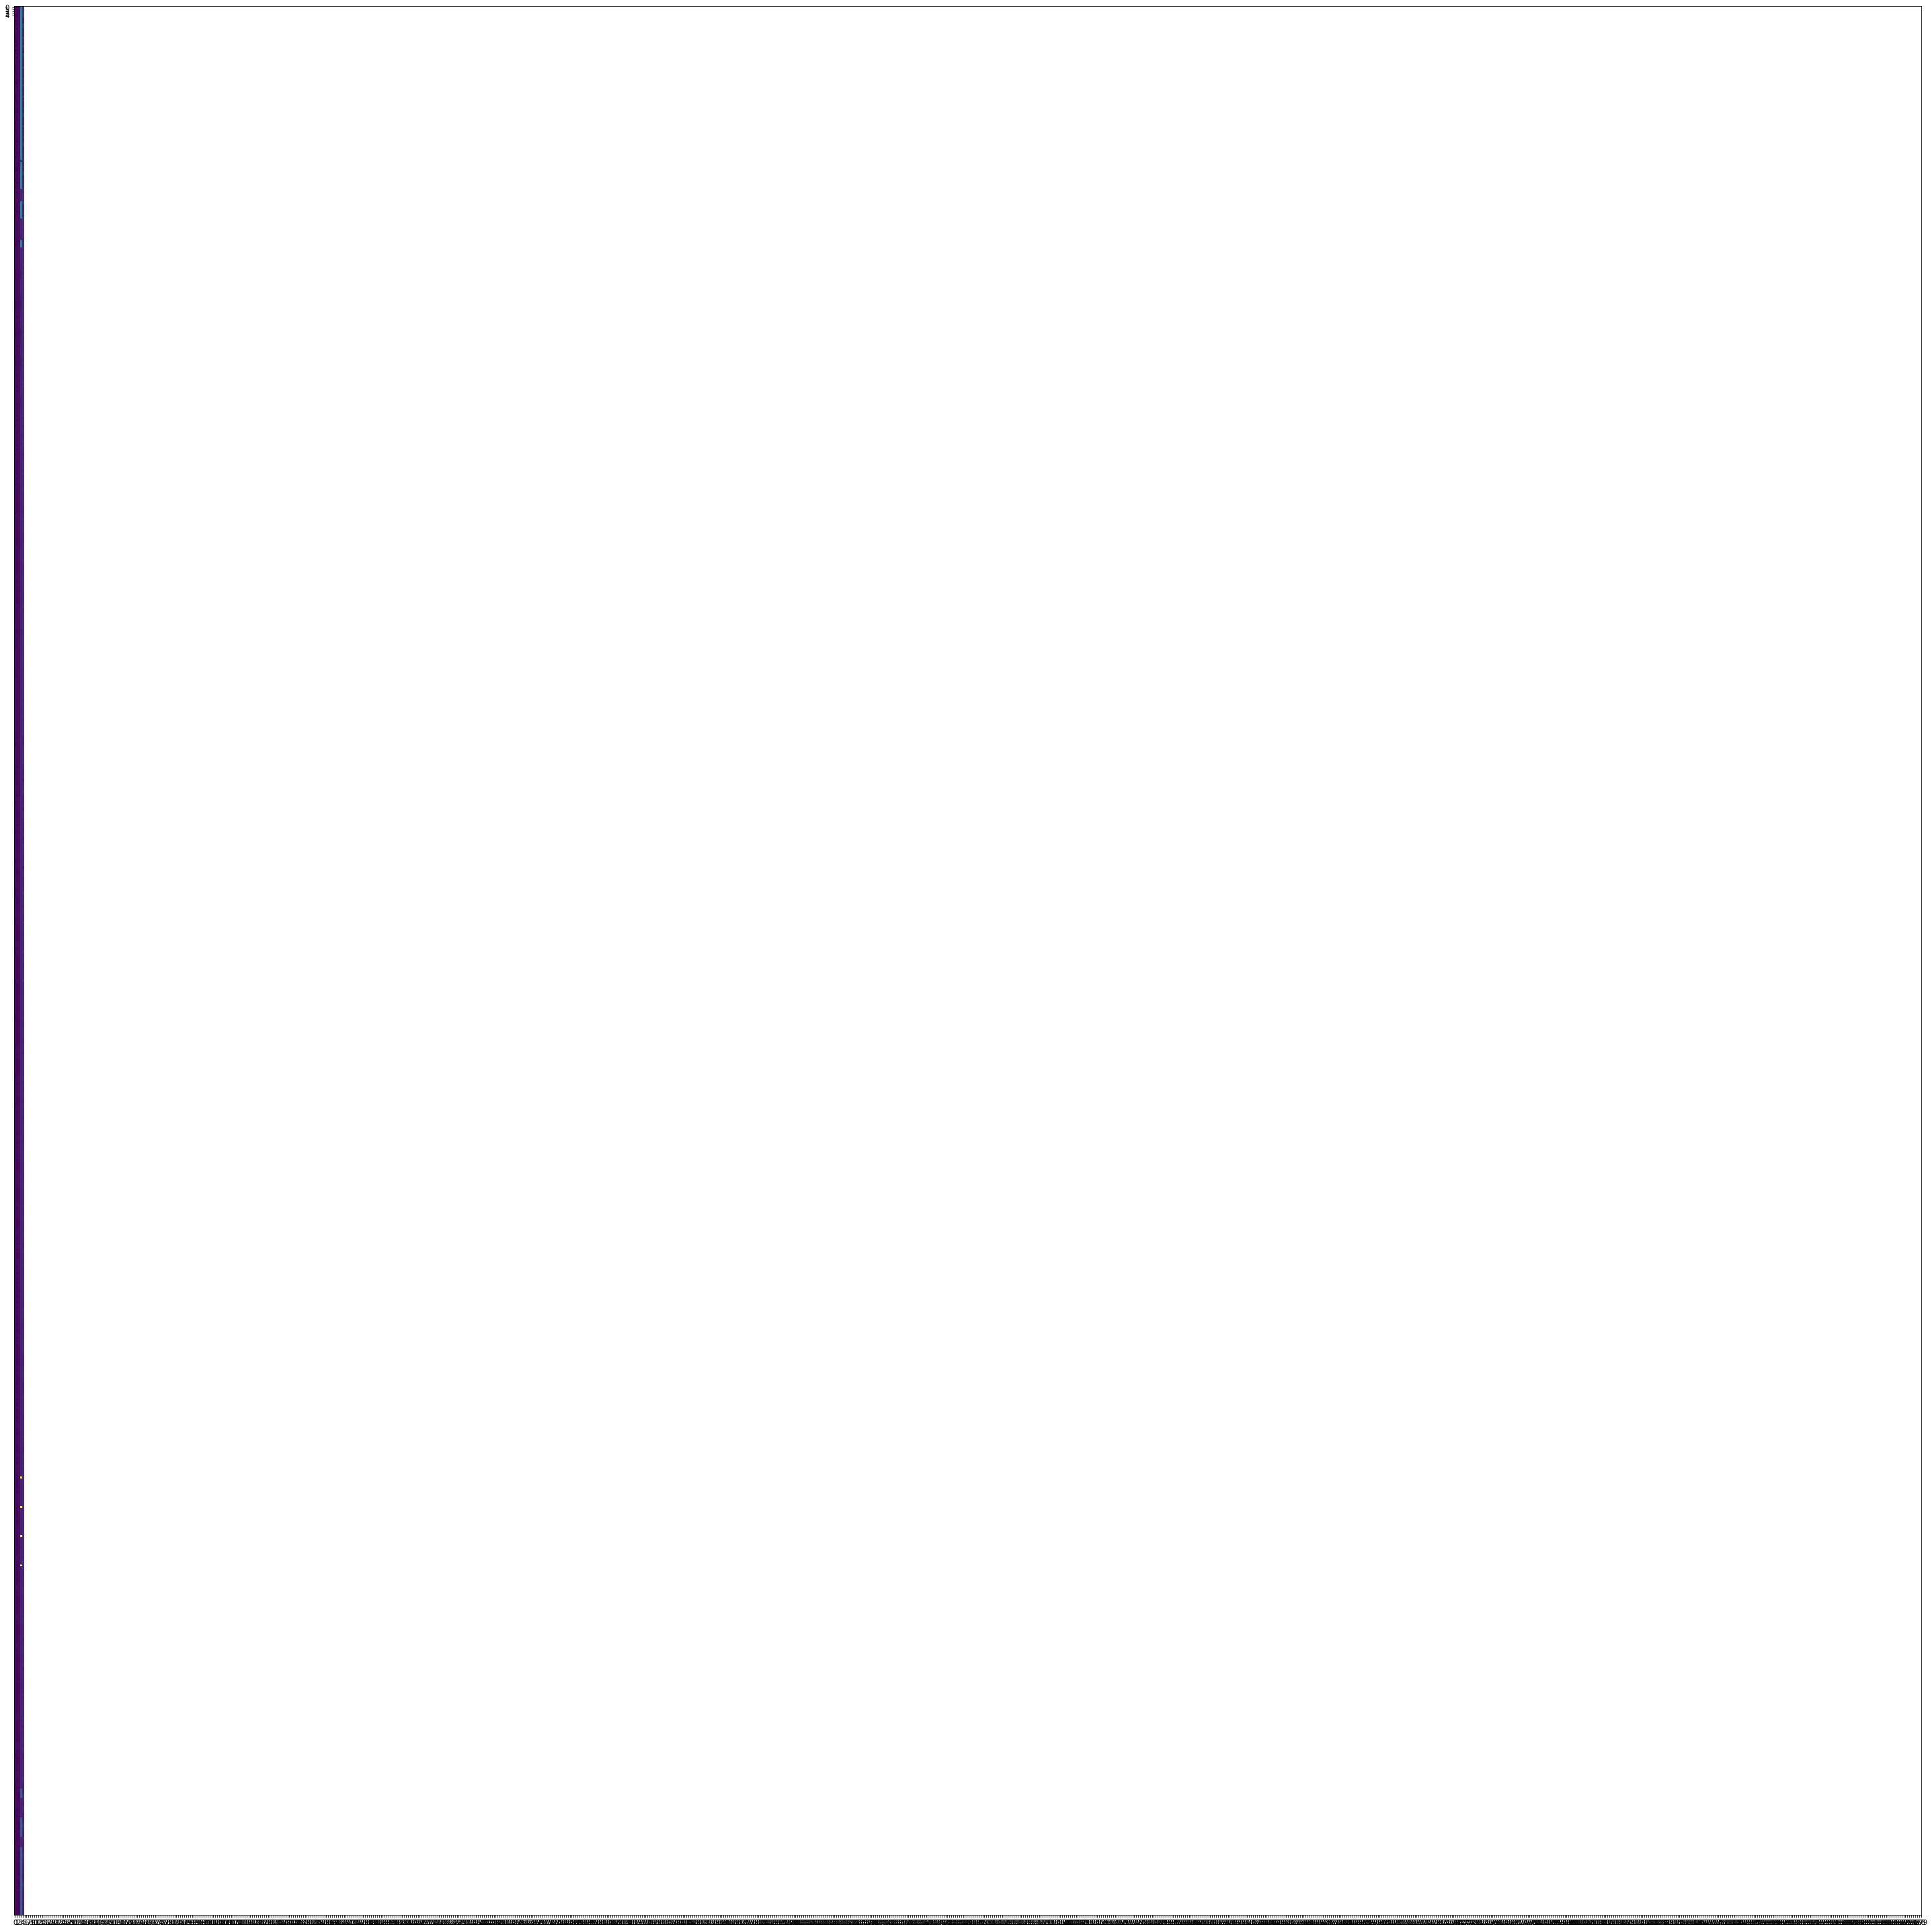

In [17]:
fig, ax = plt.subplots(figsize=(40,40))

im = ax.imshow(df_2)
ax.set_xticks(np.arange(df_2.shape[0]))
ax.set_yticks(np.arange(df_2.shape[1]))
fig.tight_layout()

# Export data

In [18]:
acc = df[col_acc].values
np.save('data.npy', acc)